#### Understanding the Problem
       customer reviews for busieness model can be long, descriptive and reading manually will be really time consuming. Here's brilliance of the Natural Language processing. we can summarize the text. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten, Concatenate, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from bs4 import BeautifulSoup
import re

import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# reading the data 
dataset = pd.read_csv('dataset\Reviews.csv', index_col=0)
dataset.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# lets's preprocess the text and summary, it will be blunder move if we use unfiltered words then it will be disaster for the model. and for me as well. 

contraction_mapping = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                       "didn't": "did not", "doesn't": "does not", "don't": "do not",

                        "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", 
                        "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", "i've": "i have",
                        
                        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam",
                       
                       "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", 
                       
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
                       "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would", "they'd've": "they would have",
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                       "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have"}

In [4]:
dataset.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
dataset[dataset.duplicated()].any(axis=0).sum()
dataset = dataset.drop_duplicates(keep='first')

In [6]:
dataset.dropna(axis=0, inplace=True)

In [7]:
stop_words = set(stopwords.words('english'))
def text_preprocessing(text):

    # lowering the text 
    text = text.lower()
    newString = BeautifulSoup(text, 'lxml').text    # eliminating the html tags in the through beautiful soup 
    newString = re.sub(r'\([^)]*\)', ' ', newString)    # removing the words inside this ()
    newString = re.sub('"', '', newString) # removing quotes 
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) # expanding terms 
    newString = re.sub(r"'s\b", "", newString)
    newString = re.sub("[^A-Za-z]", " ", newString) # match the tags which do not non numerical alphabet
    tokens = [t  for t in newString.split() if t not in stop_words]
    long_tokens = []
    for i in tokens:
        if len(i) >= 2:
            long_tokens.append(i)

    tokens = (' '.join(long_tokens)).strip()
    return tokens

text = text_preprocessing("shiva's wouldn't don't")
print(text)

shiva would


In [8]:
dataset['cleaned_text'] = dataset['Text'].apply(text_preprocessing)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13304\3314858617.py:6: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  newString = BeautifulSoup(text, 'lxml').text    # eliminating the html tags in the through

In [9]:
dataset.iloc[0, -1]

'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'

In [10]:
def summary_cleaner(text):
    '''
    clean summary column in dataset
    '''
    newString = re.sub('"', '', str(text))  # remove quotes
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  # the dictionary that we will use for expanding the contractions
    newString = re.sub(r"'s\b", "", newString)
    # match all strings that contain a non-letter
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()  # lowercase words
    tokens = newString.split()
    newString = ''
    for i in tokens:
        if len(i) > 1:
            newString = newString+i+' '
    return newString

In [11]:
dataset['cleaned_summary'] = dataset['Summary'].apply(summary_cleaner)

In [12]:
dataset.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,cleaned_summary
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,not as advertised
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,delight says it all
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,great taffy


In [13]:
print(len(dataset))

568120


In [14]:
for i in range(5):
    print(f"review: {dataset.iloc[i, -2]}")
    print(f"summary: {dataset.iloc[i, -1]}")
    print()


review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
summary: good quality dog food 

review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
summary: not as advertised 

review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
summary: delight says it all 

review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
summary: cough medicine 

review: great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
summary: great taffy 



In [15]:
# understanding the distributions of the sequences
word_count = dataset['cleaned_text'].apply(lambda x: len(word_tokenize(x)))
top_5_wordcount = word_count.sort_values(ascending=False)
print("total word count for top 5 highest words", top_5_wordcount[:5])

total word count for top 5 highest words Id
290808    1921
496754    1921
455394    1921
68701     1235
346184    1195
Name: cleaned_text, dtype: int64


In [16]:
sentences_count = dataset['cleaned_text'].apply(lambda x: len(sent_tokenize(x)))


In [17]:
summary_count = dataset['cleaned_summary'].apply(lambda x : len(word_tokenize(x)))

In [18]:
top_5_sentcount = sentences_count.sort_values(ascending=False)
print("total sentences count ", top_5_sentcount[:5])

total sentences count  Id
1         1
378979    1
378973    1
378974    1
378975    1
Name: cleaned_text, dtype: int64


In [19]:
dataset_distributions = pd.DataFrame({'word_count': word_count, 'summary_count': summary_count})
dataset_distributions

,word_count,summary_count
Id,,
1,23,4
2,18,3
3,39,4
4,17,2
5,13,2
...,...,...
568450,12,4
568451,22,1
568452,37,4


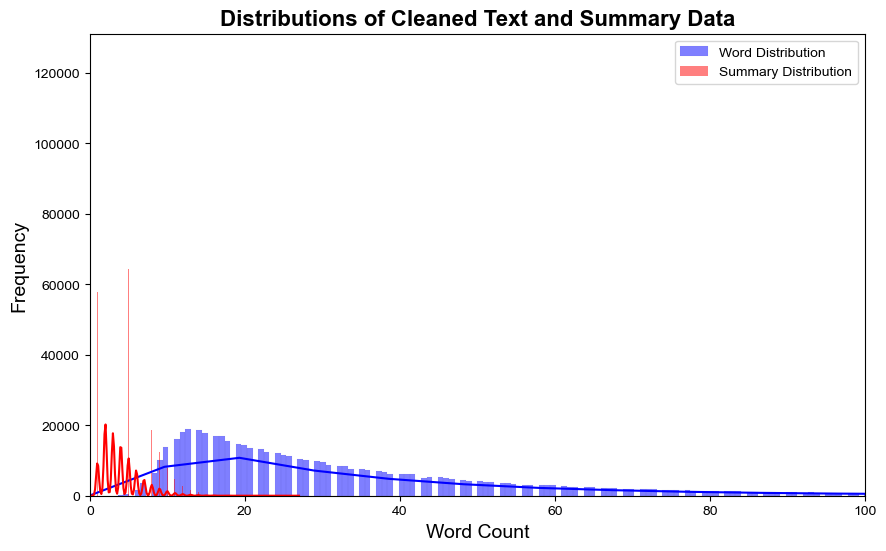

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_distributions['word_count'], color='blue', label='Word Distribution', kde=True)
sns.histplot(dataset_distributions['summary_count'], color='red', label='Summary Distribution', kde=True)

plt.xlim(0, 100)   # show only counts up to 100
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distributions of Cleaned Text and Summary Data', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='darkgrid')
plt.show()


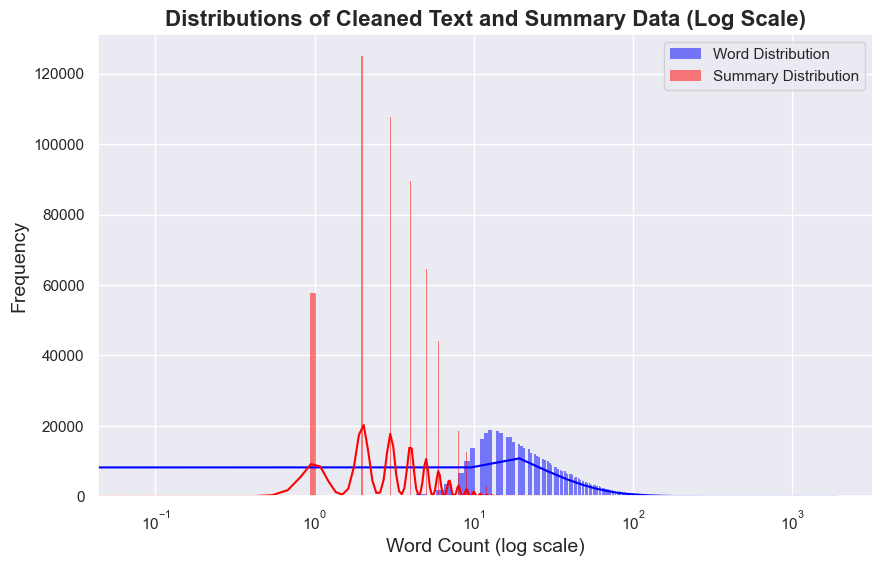

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_distributions['word_count'], color='blue', label='Word Distribution', kde=True)
sns.histplot(dataset_distributions['summary_count'], color='red', label='Summary Distribution', kde=True)

plt.xscale('log')
plt.xlabel('Word Count (log scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distributions of Cleaned Text and Summary Data (Log Scale)', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='darkgrid')
plt.show()



C:\Users\Asus\AppData\Local\Temp\ipykernel_13304\2719673885.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset_distributions['word_count'], color='blue', label='Word Distribution', shade=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13304\2719673885.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset_distributions['summary_count'], color='red', label='Summary Distribution', shade=True)


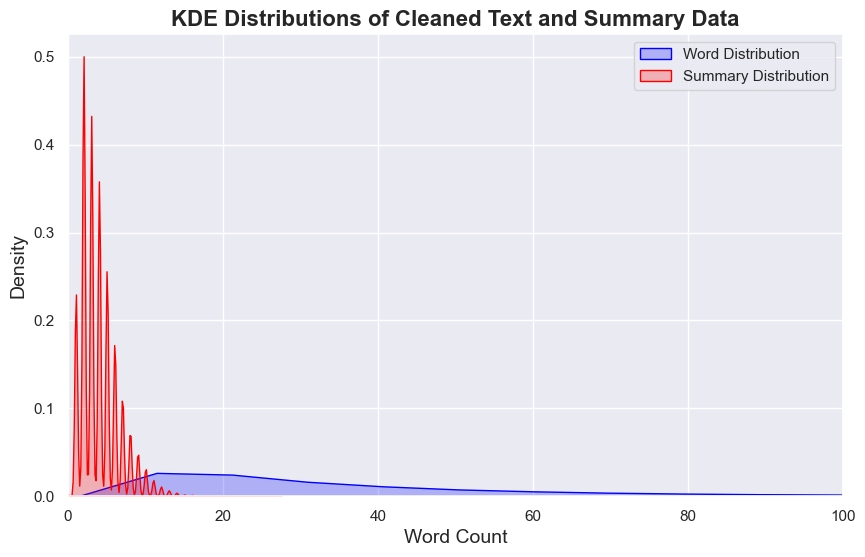

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset_distributions['word_count'], color='blue', label='Word Distribution', shade=True)
sns.kdeplot(dataset_distributions['summary_count'], color='red', label='Summary Distribution', shade=True)

plt.xlim(0, 100)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Distributions of Cleaned Text and Summary Data', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='darkgrid')
plt.show()


In [25]:
max_len_text = 80
max_len_summary = 10 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['cleaned_summary'], test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Preparing tokenizer
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

X_train = X_tokenizer.texts_to_sequences(X_train)
X_test = X_tokenizer.texts_to_sequences(X_test)

# padding zero upto the maximum length
X_train = pad_sequences(X_train, maxlen=max_len_text, padding='post')
X_test = pad_sequences(X_train, maxlen=max_len_text, padding='post')

X_voc_size = len(X_tokenizer.word_index) + 1

NameError: name 'X_train' is not defined

In [32]:
# summary tokenizer
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

# padding zero upto the maximum length
y_train = pad_sequences(y_train, maxlen=max_len_summary, padding='post')
y_test = pad_sequences(y_test, maxlen=max_len_summary, padding='post')

y_voc_size = len(y_tokenizer.word_index) + 1